### How does the choice of regularization techniques impact overfitting in different learning models?
Regularization as a methodology that is not an exact science. This means there is no one all be all solution to implemented. Depending on the machine learning algorithm and the problem that is being solved there are different methods to be applied. There are two main categories of regularization: mathematical and heuristics (with base in mathematical frameworks developed for special cases). When we go into more mathematical methods the idea is to add a penalty term to the loss function of sed model.
Between the most common are Lasso (L1), Ridge (L2) and Elastic Net (L1 and L2).
Applying these to a linear regression with one parameter w, the penalty term looks like:
* Lasso: λ·|w|
* Ridge: λ·w²
* Elastic Net: λ₁·|w| + λ₂·w²

All these need to be over cero to work, if not the update to the loss function would be useless. From the theory the effects of each can be simplified. L1 would work on a linear manner, each iteration would have similar effects. In comparison, L2 would have small effects in at the beginning but when increasing the value the effect be bigger. When combining both, would say that L1 can easily affect the fit with small values and L2 with small values would be used to fine tunning but with higher values would look closer to L1. Now with an example, a simple Sin function will be used to show the different effects of these regularization techniques.

To show the extent of regularization two models will be used: linear regression and gradient boosting.

For these experiments we will use a simple function accross four different datasets.

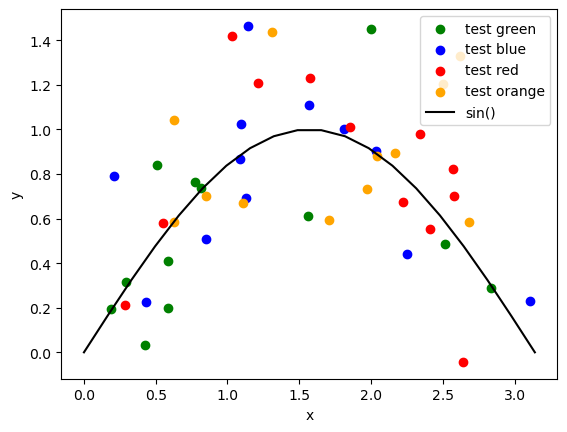

In [356]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(3474651542)

lower_bound = 0
upper_bound = np.pi
data_points = 12
noise = .35
tests = {
    'green': {'x': [],'y': []},
    'blue': {'x': [],'y': []},
    'red': {'x': [],'y': []},
    'orange': {'x': [],'y': []}
}

testssets = {
    'green': {
        'train': {'x': [],'y': []},
        'test': {'x': [],'y': []},
    },
    'blue': {
        'train': {'x': [],'y': []},
        'test': {'x': [],'y': []},
    },
    'red': {
        'train': {'x': [],'y': []},
        'test': {'x': [],'y': []},
    },
    'orange': {
        'train': {'x': [],'y': []},
        'test': {'x': [],'y': []},
    },
}

for test_k, test_v in tests.items():
    test_v['x'] = np.random.uniform(
        low=lower_bound,
        high=upper_bound,
        size=data_points
    )
    test_v['y'] = np.sin(test_v['x']) + np.random.normal(scale=noise, size=data_points)
    testssets[test_k]['train']['x'], testssets[test_k]['test']['x'], testssets[test_k]['train']['y'], testssets[test_k]['test']['y'] = train_test_split(test_v['x'], test_v['y'], test_size=0.2, random_state=42)
    plt.scatter(test_v['x'], test_v['y'], color=test_k, label=f'test {test_k}')

def plot_target():
    plt.plot(
        np.linspace(lower_bound, upper_bound, 20),
        np.sin(np.linspace(lower_bound, upper_bound, 20)),
        color='black', 
        label='sin()'
    )
    
    plt.legend(loc="upper right")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

plot_target()

### Linear regression
With the datasets defined, we can use linear regression to fit and show the predicted function for each.

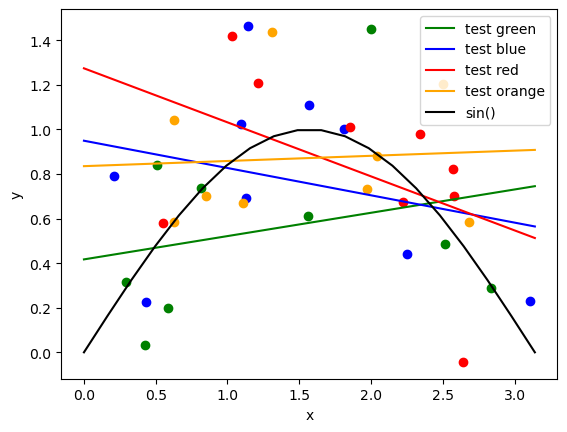

In [357]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error

lr_model = {}

for test_k, test_v in testssets.items():
    lr_model[test_k] = LinearRegression()
    lr_model[test_k].fit(test_v['train']['x'].reshape(-1, 1), test_v['train']['y'])
    plt.scatter(test_v['train']['x'], test_v['train']['y'], color=test_k)
    plt.plot(
        np.linspace(lower_bound, upper_bound, 20),
        lr_model[test_k].predict(np.linspace(lower_bound, upper_bound, 20).reshape(-1, 1)),
        color=test_k,
        label=f'test {test_k}'
    )

plot_target()

From the above we can see that the resulting function depends a lot on the training set and the bias to them. In an ideal solution all four predictions should be able to generalize the same results no matter the training data.

With that said now we can try adding Lasso regularization with small values.

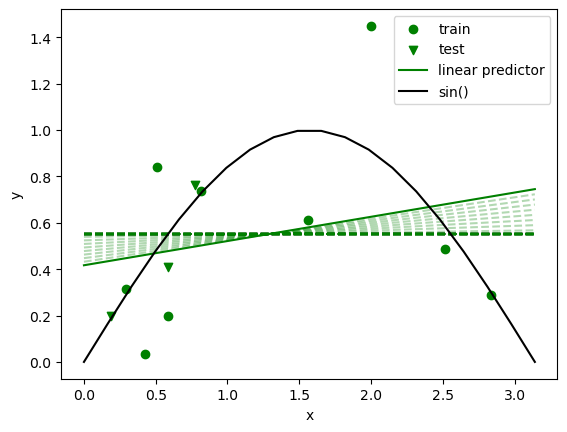

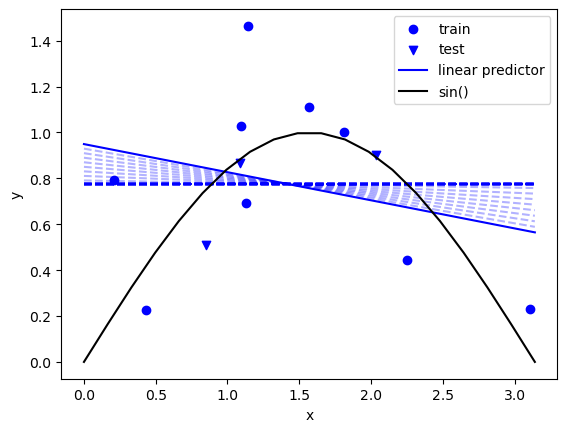

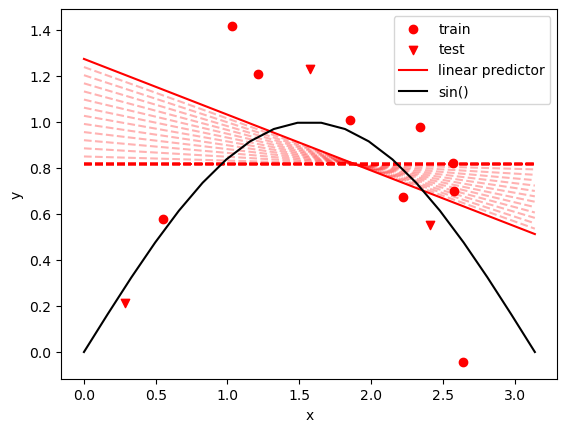

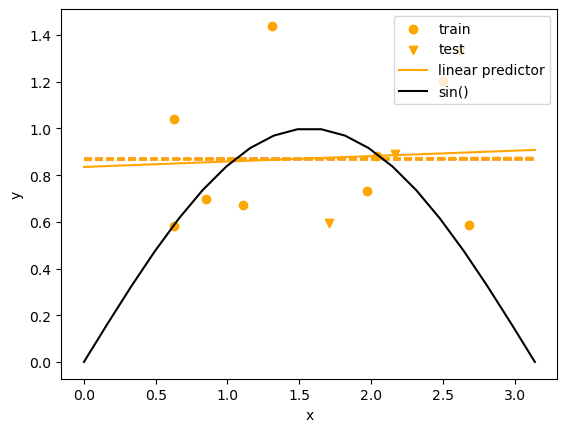

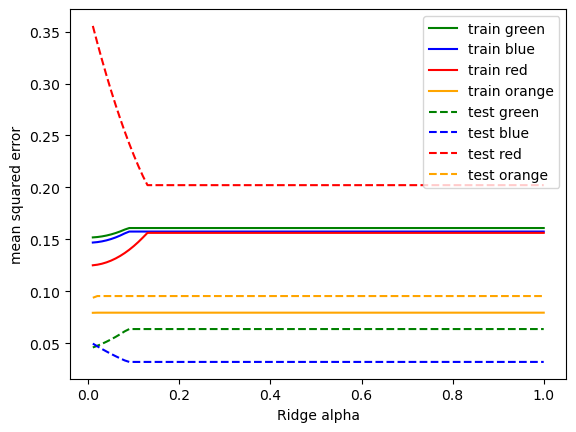

In [358]:
lasso_model = {}
lasso_train_scores = {}
lasso_test_scores = {}

for test_k, test_v in testssets.items():
    lasso_train_scores[test_k] = []
    lasso_test_scores[test_k] = []
    for alpha in np.arange(0.01,1.01,0.01):
        lasso_model = Lasso(alpha=alpha)
        lasso_model.fit(test_v['train']['x'].reshape(-1, 1), test_v['train']['y'])
        plt.plot(
            np.linspace(lower_bound, upper_bound, 20),
            lasso_model.predict(np.linspace(lower_bound, upper_bound, 20).reshape(-1, 1)),
            color=test_k,
            linestyle='dashed',
            alpha=0.3
        )
        lasso_train_scores[test_k].append([alpha, mean_squared_error(test_v['train']['y'], lasso_model.predict(test_v['train']['x'].reshape(-1, 1)))])
        lasso_test_scores[test_k].append([alpha, mean_squared_error(test_v['test']['y'], lasso_model.predict(test_v['test']['x'].reshape(-1, 1)))])

    plt.scatter(test_v['train']['x'], test_v['train']['y'], color=test_k, label='train')
    plt.scatter(test_v['test']['x'], test_v['test']['y'], color=test_k, marker='v', label='test')
    plt.plot(
        np.linspace(lower_bound, upper_bound, 20),
        lr_model[test_k].predict(np.linspace(lower_bound, upper_bound, 20).reshape(-1, 1)),
        color=test_k,
        label=f'linear predictor'
    )
    plot_target()

for test_k, train_score in lasso_train_scores.items():
    plt.plot(
        np.array(train_score)[:,0],
        np.array(train_score)[:,1],
        color=test_k,
        label=f'train {test_k}'
    )
for test_k, test_score in lasso_test_scores.items():
    plt.plot(
        np.array(test_score)[:,0],
        np.array(test_score)[:,1],
        color=test_k,
        label=f'test {test_k}',
        linestyle='dashed'
    )
plt.legend(loc='upper right')
plt.xlabel('Ridge alpha')
plt.ylabel('mean squared error')
plt.show()

From this result is evident with values between 0 an 1 the weights tend to  very fast 0 and when reached it will stay in that position. Suggesting that in this case a small alpha can generate a big change.

Now we can try adding Ridge regularization with small values.

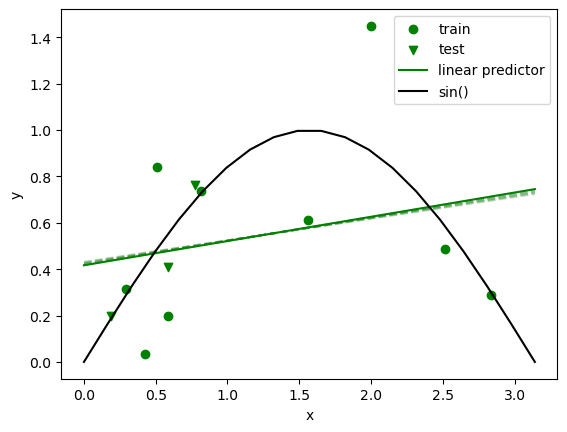

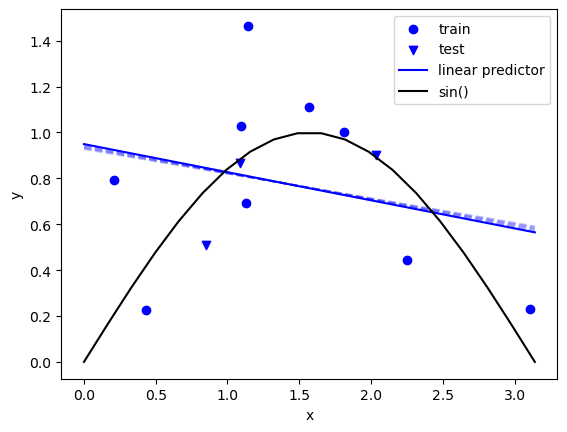

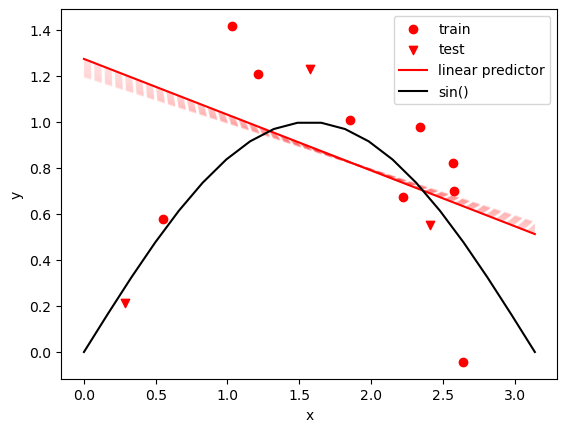

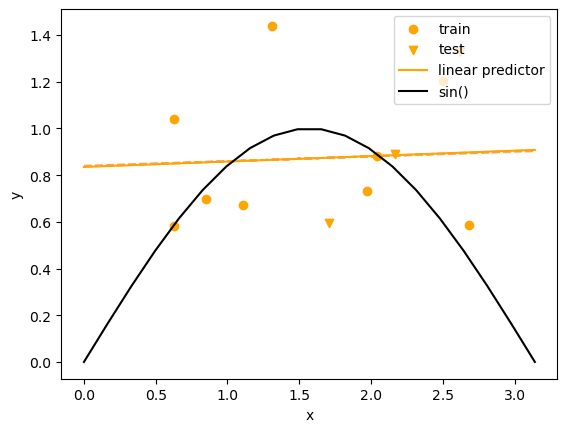

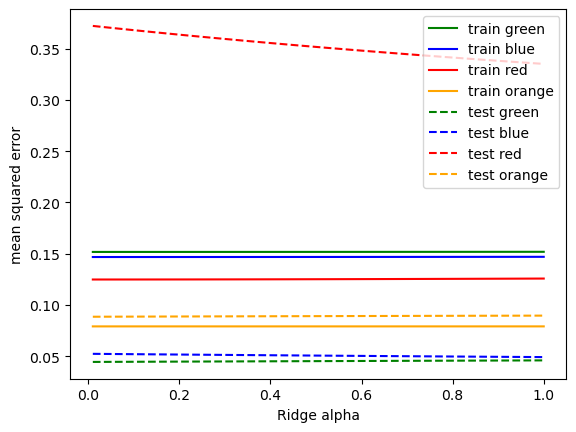

In [359]:
ridge_model = {}
ridge_train_scores = {}
ridge_test_scores = {}

for test_k, test_v in testssets.items():
    ridge_train_scores[test_k] = []
    ridge_test_scores[test_k] = []
    for alpha in np.arange(0.01,1.01,0.01):
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(test_v['train']['x'].reshape(-1, 1), test_v['train']['y'])
        plt.plot(
            np.linspace(lower_bound, upper_bound, 20),
            ridge_model.predict(np.linspace(lower_bound, upper_bound, 20).reshape(-1, 1)),
            color=test_k,
            linestyle='dashed',
            alpha=0.01
        )
        ridge_train_scores[test_k].append([alpha, mean_squared_error(test_v['train']['y'], ridge_model.predict(test_v['train']['x'].reshape(-1, 1)))])
        ridge_test_scores[test_k].append([alpha, mean_squared_error(test_v['test']['y'], ridge_model.predict(test_v['test']['x'].reshape(-1, 1)))])

    plt.scatter(test_v['train']['x'], test_v['train']['y'], color=test_k, label='train')
    plt.scatter(test_v['test']['x'], test_v['test']['y'], color=test_k, marker='v', label='test')
    plt.plot(
        np.linspace(lower_bound, upper_bound, 20),
        lr_model[test_k].predict(np.linspace(lower_bound, upper_bound, 20).reshape(-1, 1)),
        color=test_k,
        label=f'linear predictor'
    )
    plot_target()

for test_k, train_score in ridge_train_scores.items():
    plt.plot(
        np.array(train_score)[:,0],
        np.array(train_score)[:,1],
        color=test_k,
        label=f'train {test_k}'
    )
for test_k, test_score in ridge_test_scores.items():
    plt.plot(
        np.array(test_score)[:,0],
        np.array(test_score)[:,1],
        color=test_k,
        label=f'test {test_k}',
        linestyle='dashed'
    )
plt.legend(loc='upper right')
plt.xlabel('Ridge alpha')
plt.ylabel('mean squared error')
plt.show()

From this result we can see that applying L2 with the same values as L1 the effect doesn’t reach weight equal to 0 that easily.

Now we can try using bigger values.

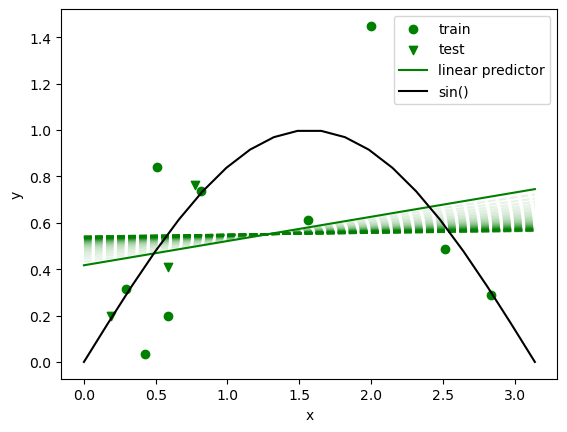

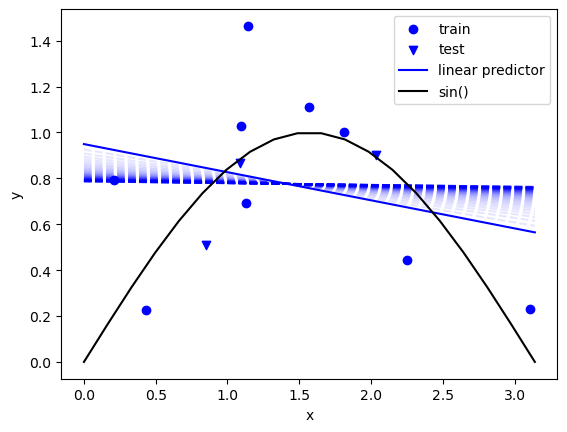

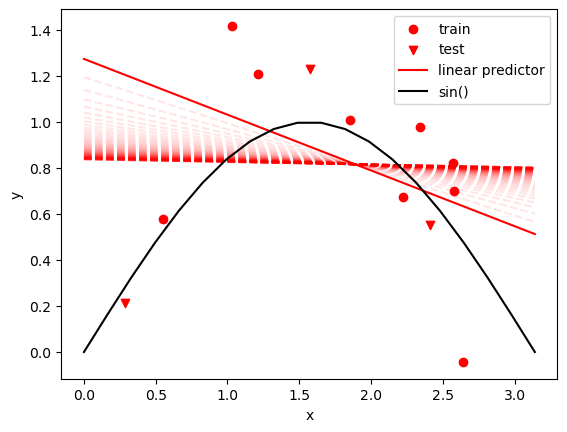

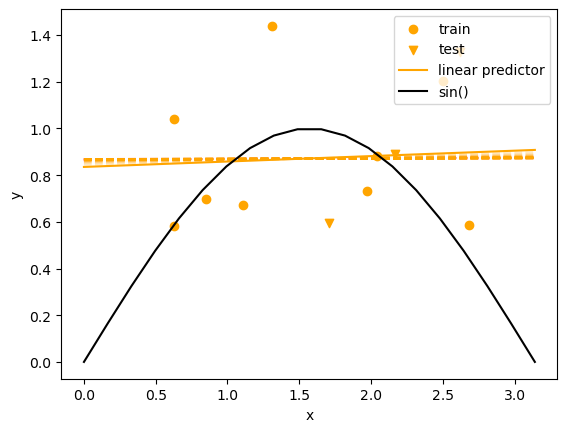

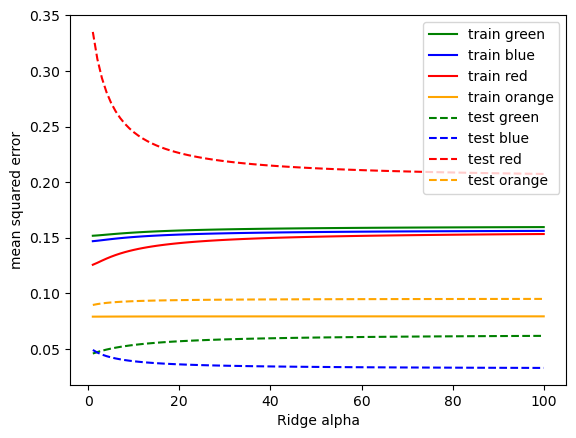

In [360]:
ridge_model = {}
ridge_2_train_scores = {}
ridge_2_test_scores = {}

for test_k, test_v in testssets.items():
    ridge_2_train_scores[test_k] = []
    ridge_2_test_scores[test_k] = []
    for alpha in np.arange(1,101,1):
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(test_v['train']['x'].reshape(-1, 1), test_v['train']['y'])
        plt.plot(
            np.linspace(lower_bound, upper_bound, 20),
            ridge_model.predict(np.linspace(lower_bound, upper_bound, 20).reshape(-1, 1)),
            color=test_k,
            linestyle='dashed',
            alpha=0.1
        )
        ridge_2_train_scores[test_k].append([alpha, mean_squared_error(test_v['train']['y'], ridge_model.predict(test_v['train']['x'].reshape(-1, 1)))])
        ridge_2_test_scores[test_k].append([alpha, mean_squared_error(test_v['test']['y'], ridge_model.predict(test_v['test']['x'].reshape(-1, 1)))])

    plt.scatter(test_v['train']['x'], test_v['train']['y'], color=test_k, label='train')
    plt.scatter(test_v['test']['x'], test_v['test']['y'], color=test_k, marker='v', label='test')
    plt.plot(
        np.linspace(lower_bound, upper_bound, 20),
        lr_model[test_k].predict(np.linspace(lower_bound, upper_bound, 20).reshape(-1, 1)),
        color=test_k,
        label=f'linear predictor'
    )
    plot_target()

for test_k, train_score in ridge_2_train_scores.items():
    plt.plot(
        np.array(train_score)[:,0],
        np.array(train_score)[:,1],
        color=test_k,
        label=f'train {test_k}'
    )
for test_k, test_score in ridge_2_test_scores.items():
    plt.plot(
        np.array(test_score)[:,0],
        np.array(test_score)[:,1],
        color=test_k,
        label=f'test {test_k}',
        linestyle='dashed'
    )
plt.legend(loc='upper right')
plt.xlabel('Ridge alpha')
plt.ylabel('mean squared error')
plt.show()

From these results we can see that depending on the training and test set the benefits of regularization can vary a lot. Some of these can have big improvements in generalization, other not so much or even can have decreased performance in relation of the unseen test data.

For last we will test elastic net, combining both L1 and L2 regularization in one.

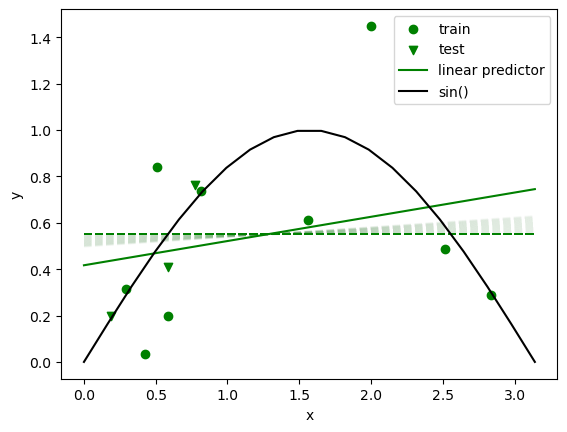

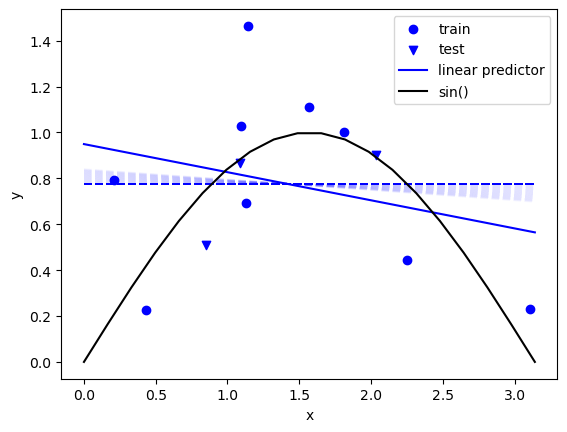

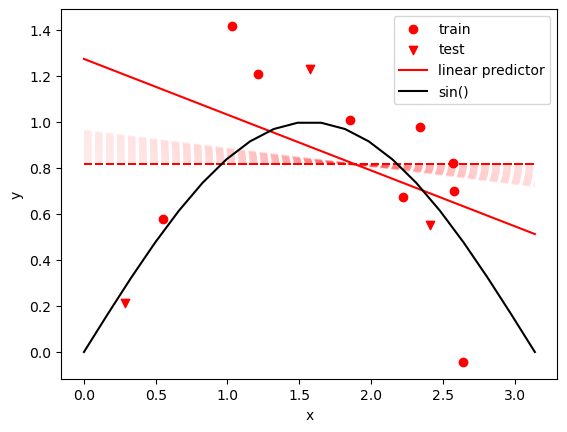

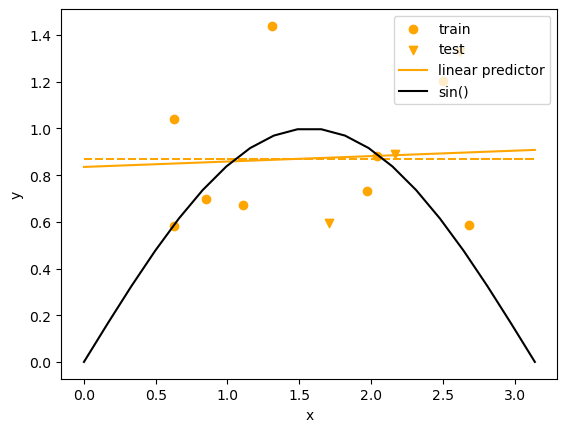

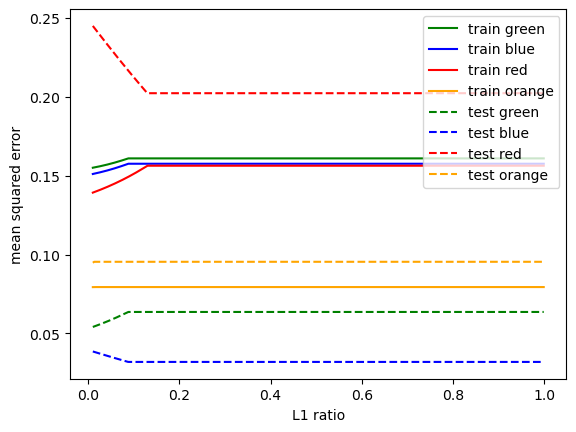

In [361]:
elastic_model = {}
elastic_train_scores = {}
elastic_test_scores = {}

for test_k, test_v in testssets.items():
    elastic_train_scores[test_k] = []
    elastic_test_scores[test_k] = []
    for ratio in np.arange(0.01,1,0.001):
        elastic_model = ElasticNet(l1_ratio=ratio)
        elastic_model.fit(test_v['train']['x'].reshape(-1, 1), test_v['train']['y'])
        plt.plot(
            np.linspace(lower_bound, upper_bound, 20),
            elastic_model.predict(np.linspace(lower_bound, upper_bound, 20).reshape(-1, 1)),
            color=test_k,
            linestyle='dashed',
            alpha=0.01
        )
        elastic_train_scores[test_k].append([ratio, mean_squared_error(test_v['train']['y'], elastic_model.predict(test_v['train']['x'].reshape(-1, 1)))])
        elastic_test_scores[test_k].append([ratio, mean_squared_error(test_v['test']['y'], elastic_model.predict(test_v['test']['x'].reshape(-1, 1)))])

    plt.scatter(test_v['train']['x'], test_v['train']['y'], color=test_k, label='train')
    plt.scatter(test_v['test']['x'], test_v['test']['y'], color=test_k, marker='v', label='test')
    plt.plot(
        np.linspace(lower_bound, upper_bound, 20),
        lr_model[test_k].predict(np.linspace(lower_bound, upper_bound, 20).reshape(-1, 1)),
        color=test_k,
        label=f'linear predictor'
    )
    plot_target()

for test_k, train_score in elastic_train_scores.items():
    plt.plot(
        np.array(train_score)[:,0],
        np.array(train_score)[:,1],
        color=test_k,
        label=f'train {test_k}'
    )
for test_k, test_score in elastic_test_scores.items():
    plt.plot(
        np.array(test_score)[:,0],
        np.array(test_score)[:,1],
        color=test_k,
        label=f'test {test_k}',
        linestyle='dashed'
    )
plt.legend(loc='upper right')
plt.xlabel('L1 ratio')
plt.ylabel('mean squared error')
plt.show()

In this case the behavior where at the beginning it works like ridge with small values, but when the ratio starts to tend to L1 regularization the function starts to approach a weight 0 faster. 

### Linear regression results
With all the models trained and tests, a plot comparing the regularization term and the mean squared error of the train and test sets (the sames previously shown but in group).

(0.0, 0.4)

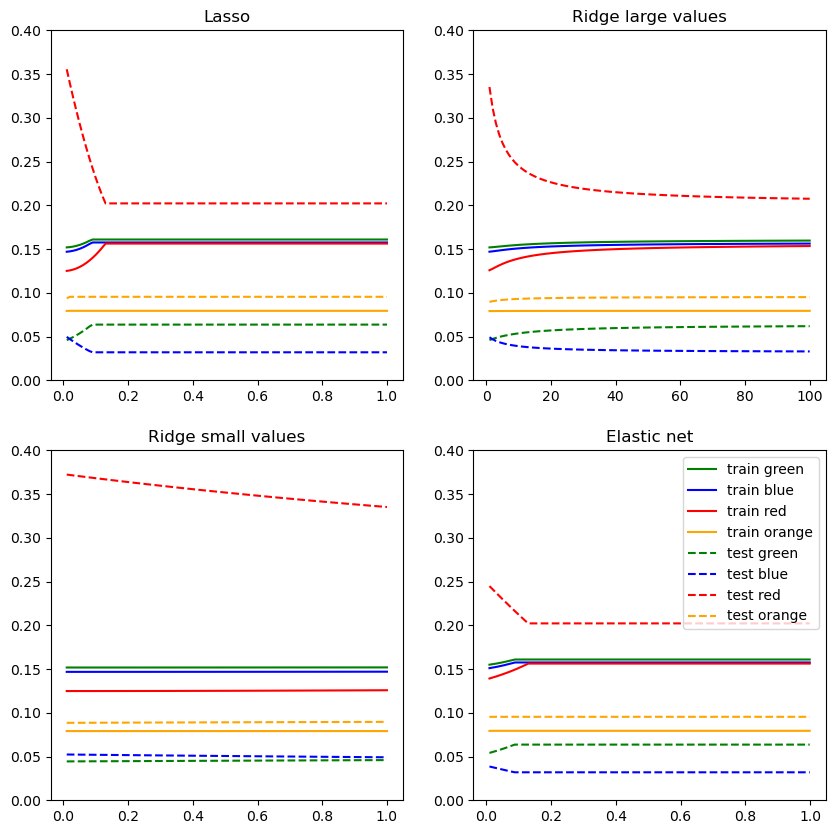

In [362]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for test_k, train_score in lasso_train_scores.items():
    axs[0, 0].plot(
        np.array(train_score)[:,0],
        np.array(train_score)[:,1],
        color=test_k,
        label=f'train {test_k}'
    )
for test_k, test_score in lasso_test_scores.items():
    axs[0, 0].plot(
        np.array(test_score)[:,0],
        np.array(test_score)[:,1],
        color=test_k,
        label=f'test {test_k}',
        linestyle='dashed'
    )
axs[0, 0].set_title('Lasso')
axs[0, 0].set_ylim(0, 0.4)

for test_k, train_score in ridge_train_scores.items():
    axs[1, 0].plot(
        np.array(train_score)[:,0],
        np.array(train_score)[:,1],
        color=test_k,
        label=f'train {test_k}'
    )
for test_k, test_score in ridge_test_scores.items():
    axs[1, 0].plot(
        np.array(test_score)[:,0],
        np.array(test_score)[:,1],
        color=test_k,
        label=f'test {test_k}',
        linestyle='dashed'
    )
axs[1, 0].set_title('Ridge small values')
axs[1, 0].set_ylim(0, 0.4)

for test_k, train_score in ridge_2_train_scores.items():
    axs[0, 1].plot(
        np.array(train_score)[:,0],
        np.array(train_score)[:,1],
        color=test_k,
        label=f'train {test_k}'
    )
for test_k, test_score in ridge_2_test_scores.items():
    axs[0, 1].plot(
        np.array(test_score)[:,0],
        np.array(test_score)[:,1],
        color=test_k,
        label=f'test {test_k}',
        linestyle='dashed'
    )
axs[0, 1].set_title('Ridge large values')
axs[0, 1].set_ylim(0, 0.4)

for test_k, train_score in elastic_train_scores.items():
    axs[1, 1].plot(
        np.array(train_score)[:,0],
        np.array(train_score)[:,1],
        color=test_k,
        label=f'train {test_k}'
    )
for test_k, test_score in elastic_test_scores.items():
    axs[1, 1].plot(
        np.array(test_score)[:,0],
        np.array(test_score)[:,1],
        color=test_k,
        label=f'test {test_k}',
        linestyle='dashed'
    )
axs[1, 1].legend(loc='upper right')
axs[1, 1].set_title('Elastic net')
axs[1, 1].set_ylim(0, 0.4)


With all the result compiled, there are some conclusions that we can draw for this specific experiment.
* There is a point in which a regularization term stops being effective. In this case when the weights are 0 giving a slope of the same value.
* In some cases, the regularization term doesn’t improve the performance for unseen data.
* In some cases, it improves generalization while keeping seen data performance.
* In some cases, it can decrease the performance of unseen data.
* L2 regularization in small values can be used for fine tuning.
* The behavior of L1 in small values is comparable to L2 with large values even if they don’t have the same performance.
* Elastic net can be a good combination that uses both, where a low L1 ratio with comparable alpha can be used to fine tune and higher the L1 ratio the change in error for some unseen data is more prominent.

These points give a round picture of the use of regularization terms and the effect they can have on “overfit” data and the way they can improve out of sample error. But all of these depend on al lot of the data available, the distribution of it an if when using them what values provide the best solution without sacrificing much performance. Where do we should stop trying to regularize and save computing power.

### Gradient boosting

For this experiments we will use a random setup with the goal of having a base model that overfits each test dataset and to show the extent of the increased generalization error as the boosting iterations increase

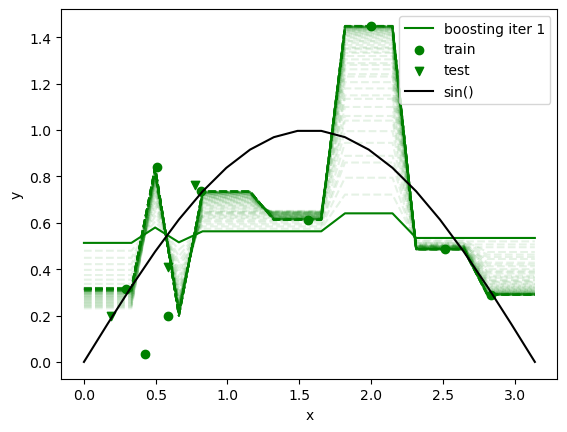

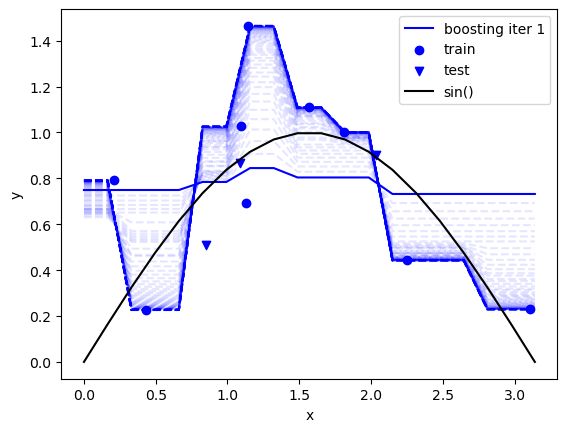

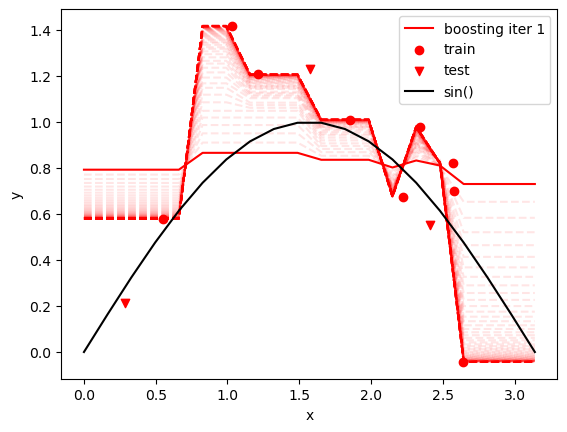

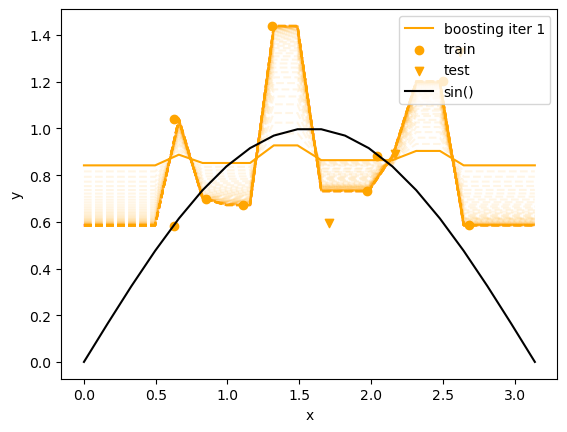

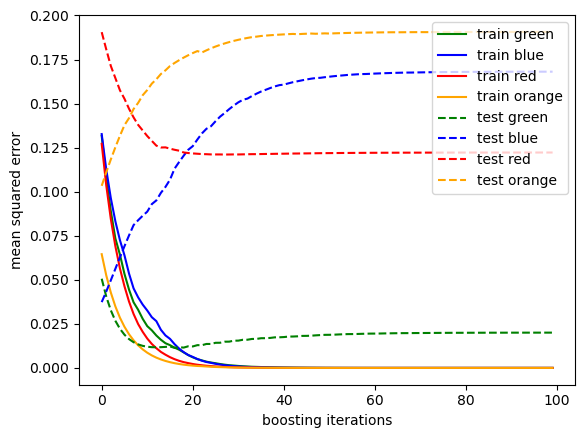

In [363]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = {}
gb_train_scores = {}
gb_test_scores = {}

params = {
    "n_estimators": 100,
    "max_leaf_nodes": 100,
    "max_depth": 100,
    "random_state": 42,
    "min_samples_split": 3,
}


for test_k, test_v in testssets.items():
    gb_train_scores[test_k] = []
    gb_test_scores[test_k] = []
    gb_model = GradientBoostingRegressor(**params)
    gb_model.fit(test_v['train']['x'].reshape(-1, 1), test_v['train']['y'])
    
    for iter, pred in enumerate(gb_model.staged_predict(test_v['train']['x'].reshape(-1, 1))):
        gb_train_scores[test_k].append([iter, mean_squared_error(test_v['train']['y'], pred)])
    
    for iter, pred in enumerate(gb_model.staged_predict(test_v['test']['x'].reshape(-1, 1))):
        gb_test_scores[test_k].append([iter, mean_squared_error(test_v['test']['y'], pred)])
    
    for iter, pred in enumerate(gb_model.staged_predict(np.linspace(lower_bound, upper_bound, 20).reshape(-1, 1))):
        plt.plot(
            np.linspace(lower_bound, upper_bound, 20),
            pred,
            color=test_k,
            linestyle='dashed' if iter > 0 else 'solid',
            alpha=0.1 if iter > 0 else 1,
            label='boosting iter 1' if iter == 0 else None
        )

    plt.scatter(test_v['train']['x'], test_v['train']['y'], color=test_k, label='train')
    plt.scatter(test_v['test']['x'], test_v['test']['y'], color=test_k, marker='v', label='test')
    plot_target()

for test_k, train_score in gb_train_scores.items():
    plt.plot(
        np.array(train_score)[:,0],
        np.array(train_score)[:,1],
        color=test_k,
        label=f'train {test_k}'
    )
for test_k, test_score in gb_test_scores.items():
    plt.plot(
        np.array(test_score)[:,0],
        np.array(test_score)[:,1],
        color=test_k,
        label=f'test {test_k}',
        linestyle='dashed'
    )
plt.legend(loc='upper right')
plt.xlabel('boosting iterations')
plt.ylabel('mean squared error')
plt.show()


From this is evident how it overfits in the majority of cases and the generalization error increases the more iterations the model goes through.

Now we can test updating the learning rate. Which by default is 0.1, giving the notion that initially we have better testing performance but it decreases over time.

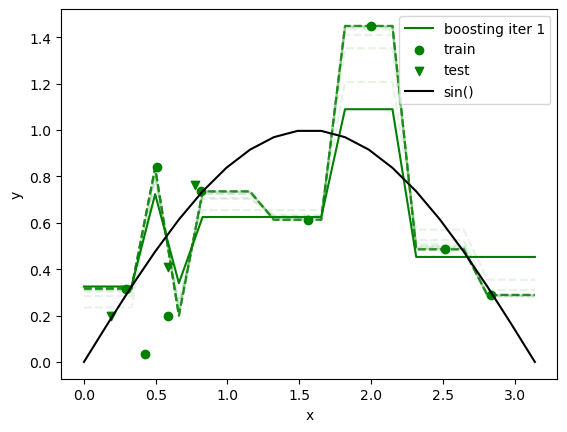

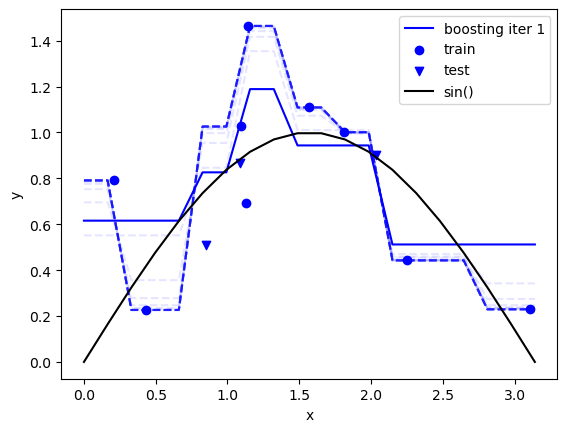

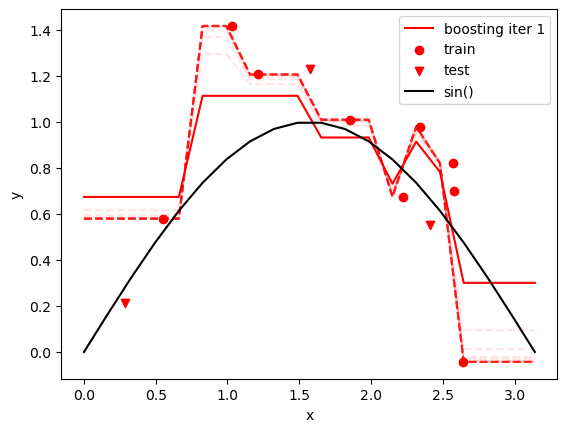

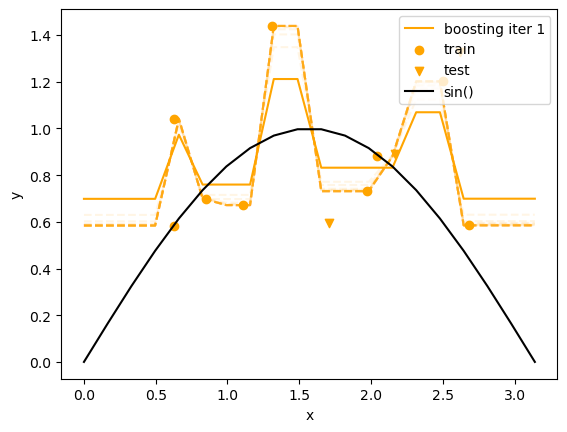

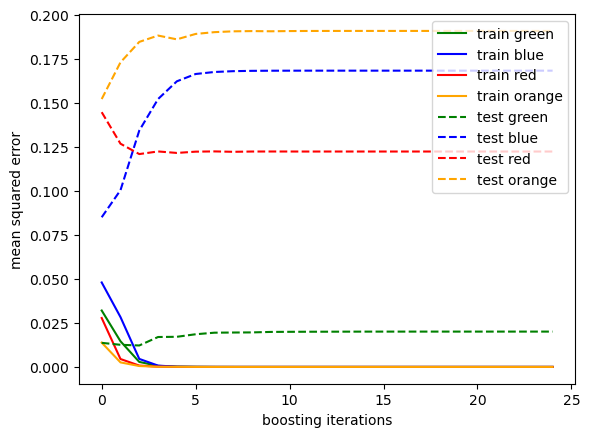

In [364]:
gb1_model = {}
gb1_train_scores = {}
gb1_test_scores = {}

# in the case of learning rate there is tradeoff between it and the amount of boosting iterations, meaning that the higher the learning rate the lest booting iterations are needed.
params = {
    "n_estimators": 25,
    "max_leaf_nodes": 100,
    "max_depth": 100,
    "random_state": 42,
    "min_samples_split": 3,
    "learning_rate": 0.6,
}


for test_k, test_v in testssets.items():
    gb1_train_scores[test_k] = []
    gb1_test_scores[test_k] = []
    gb1_model = GradientBoostingRegressor(**params)
    gb1_model.fit(test_v['train']['x'].reshape(-1, 1), test_v['train']['y'])
    
    for iter, pred in enumerate(gb1_model.staged_predict(test_v['train']['x'].reshape(-1, 1))):
        gb1_train_scores[test_k].append([iter, mean_squared_error(test_v['train']['y'], pred)])
    
    for iter, pred in enumerate(gb1_model.staged_predict(test_v['test']['x'].reshape(-1, 1))):
        gb1_test_scores[test_k].append([iter, mean_squared_error(test_v['test']['y'], pred)])
    
    for iter, pred in enumerate(gb1_model.staged_predict(np.linspace(lower_bound, upper_bound, 20).reshape(-1, 1))):
        plt.plot(
            np.linspace(lower_bound, upper_bound, 20),
            pred,
            color=test_k,
            linestyle='dashed' if iter > 0 else 'solid',
            alpha=0.1 if iter > 0 else 1,
            label='boosting iter 1' if iter == 0 else None
        )

    plt.scatter(test_v['train']['x'], test_v['train']['y'], color=test_k, label='train')
    plt.scatter(test_v['test']['x'], test_v['test']['y'], color=test_k, marker='v', label='test')
    plot_target()

for test_k, train_score in gb1_train_scores.items():
    plt.plot(
        np.array(train_score)[:,0],
        np.array(train_score)[:,1],
        color=test_k,
        label=f'train {test_k}'
    )
for test_k, test_score in gb1_test_scores.items():
    plt.plot(
        np.array(test_score)[:,0],
        np.array(test_score)[:,1],
        color=test_k,
        label=f'test {test_k}',
        linestyle='dashed'
    )
plt.legend(loc='upper right')
plt.xlabel('boosting iterations')
plt.ylabel('mean squared error')
plt.show()

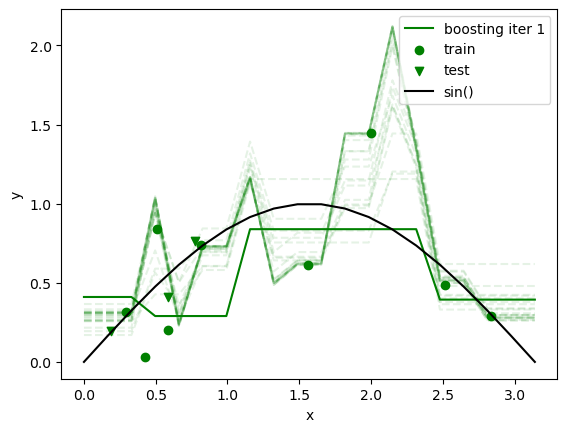

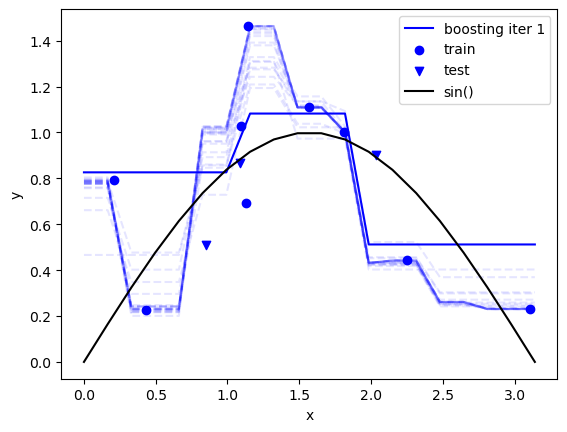

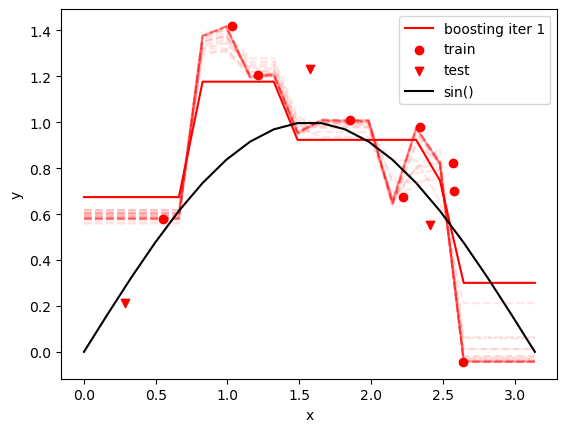

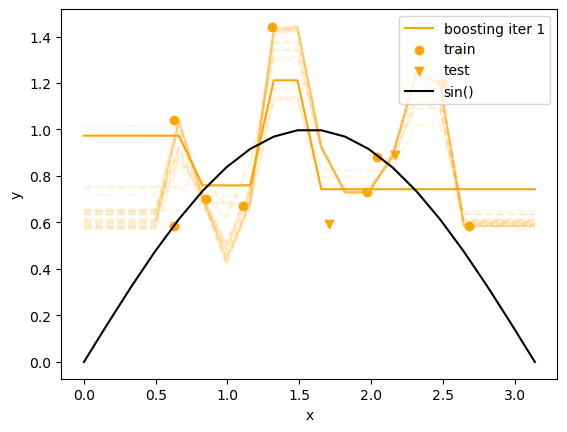

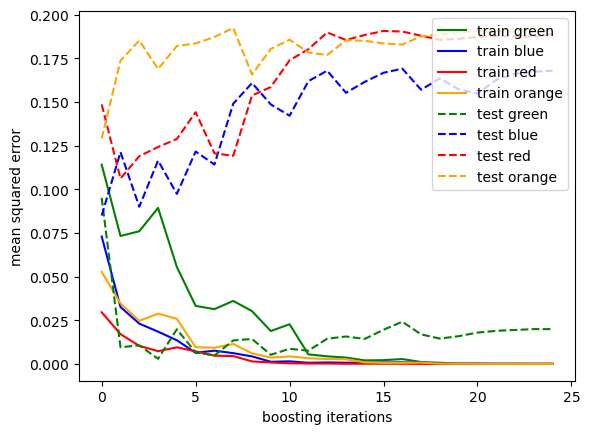

In [365]:
gb2_model = {}
gb2_train_scores = {}
gb2_test_scores = {}

params = {
    "n_estimators": 25,
    "max_leaf_nodes": 100,
    "max_depth": 100,
    "random_state": 42,
    "min_samples_split": 3,
    "learning_rate": 0.6,
    "subsample":0.7,
}


for test_k, test_v in testssets.items():
    gb2_train_scores[test_k] = []
    gb2_test_scores[test_k] = []
    gb2_model = GradientBoostingRegressor(**params)
    gb2_model.fit(test_v['train']['x'].reshape(-1, 1), test_v['train']['y'])
    
    for iter, pred in enumerate(gb2_model.staged_predict(test_v['train']['x'].reshape(-1, 1))):
        gb2_train_scores[test_k].append([iter, mean_squared_error(test_v['train']['y'], pred)])
    
    for iter, pred in enumerate(gb2_model.staged_predict(test_v['test']['x'].reshape(-1, 1))):
        gb2_test_scores[test_k].append([iter, mean_squared_error(test_v['test']['y'], pred)])
    
    for iter, pred in enumerate(gb2_model.staged_predict(np.linspace(lower_bound, upper_bound, 20).reshape(-1, 1))):
        plt.plot(
            np.linspace(lower_bound, upper_bound, 20),
            pred,
            color=test_k,
            linestyle='dashed' if iter > 0 else 'solid',
            alpha=0.1 if iter > 0 else 1,
            label='boosting iter 1' if iter == 0 else None
        )

    plt.scatter(test_v['train']['x'], test_v['train']['y'], color=test_k, label='train')
    plt.scatter(test_v['test']['x'], test_v['test']['y'], color=test_k, marker='v', label='test')
    plot_target()

for test_k, train_score in gb2_train_scores.items():
    plt.plot(
        np.array(train_score)[:,0],
        np.array(train_score)[:,1],
        color=test_k,
        label=f'train {test_k}'
    )
for test_k, test_score in gb2_test_scores.items():
    plt.plot(
        np.array(test_score)[:,0],
        np.array(test_score)[:,1],
        color=test_k,
        label=f'test {test_k}',
        linestyle='dashed'
    )
plt.legend(loc='upper right')
plt.xlabel('boosting iterations')
plt.ylabel('mean squared error')
plt.show()

Testing shrinkage with max features is also possible but since there is no more than just one feature in the dataset this would look like a normal shrinkage model.

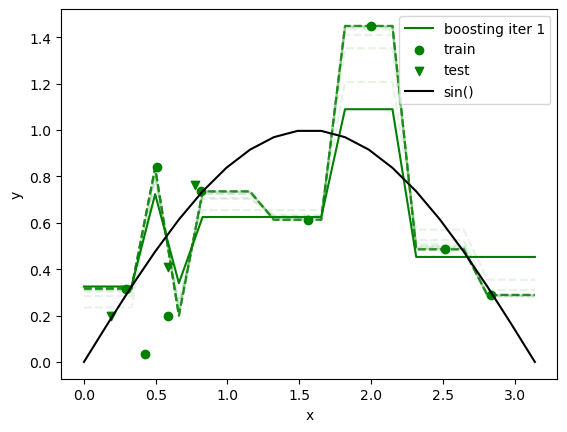

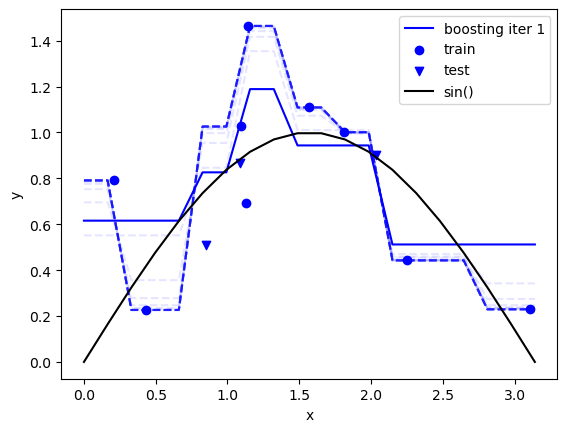

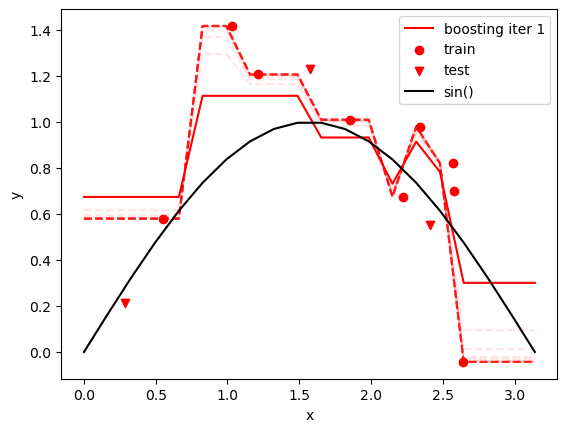

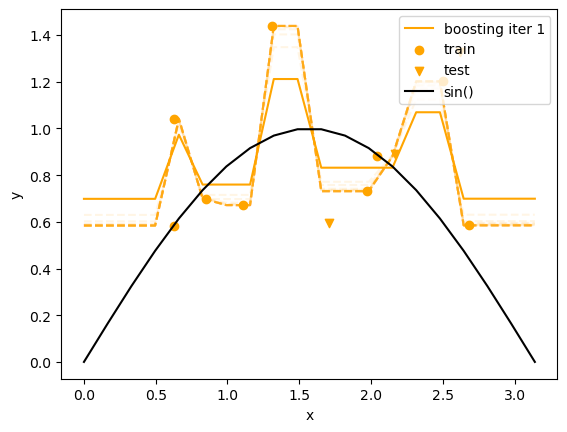

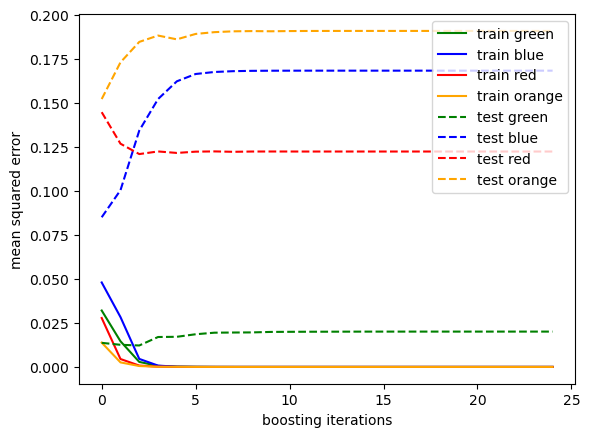

In [366]:
gb3_model = {}
gb3_train_scores = {}
gb3_test_scores = {}

params = {
    "n_estimators": 25,
    "max_leaf_nodes": 100,
    "max_depth": 100,
    "random_state": 42,
    "min_samples_split": 3,
    "learning_rate": 0.6,
    "max_features":3
}


for test_k, test_v in testssets.items():
    gb3_train_scores[test_k] = []
    gb3_test_scores[test_k] = []
    gb3_model = GradientBoostingRegressor(**params)
    gb3_model.fit(test_v['train']['x'].reshape(-1, 1), test_v['train']['y'])
    
    for iter, pred in enumerate(gb3_model.staged_predict(test_v['train']['x'].reshape(-1, 1))):
        gb3_train_scores[test_k].append([iter, mean_squared_error(test_v['train']['y'], pred)])
    
    for iter, pred in enumerate(gb3_model.staged_predict(test_v['test']['x'].reshape(-1, 1))):
        gb3_test_scores[test_k].append([iter, mean_squared_error(test_v['test']['y'], pred)])
    
    for iter, pred in enumerate(gb3_model.staged_predict(np.linspace(lower_bound, upper_bound, 20).reshape(-1, 1))):
        plt.plot(
            np.linspace(lower_bound, upper_bound, 20),
            pred,
            color=test_k,
            linestyle='dashed' if iter > 0 else 'solid',
            alpha=0.1 if iter > 0 else 1,
            label='boosting iter 1' if iter == 0 else None
        )

    plt.scatter(test_v['train']['x'], test_v['train']['y'], color=test_k, label='train')
    plt.scatter(test_v['test']['x'], test_v['test']['y'], color=test_k, marker='v', label='test')
    plot_target()

for test_k, train_score in gb3_train_scores.items():
    plt.plot(
        np.array(train_score)[:,0],
        np.array(train_score)[:,1],
        color=test_k,
        label=f'train {test_k}'
    )
for test_k, test_score in gb3_test_scores.items():
    plt.plot(
        np.array(test_score)[:,0],
        np.array(test_score)[:,1],
        color=test_k,
        label=f'test {test_k}',
        linestyle='dashed'
    )
plt.legend(loc='upper right')
plt.xlabel('boosting iterations')
plt.ylabel('mean squared error')
plt.show()

### Gradient boosting results
With all the models trained and tests, a plot comparing the regularization term and the mean squared error of the train and test sets (the sames previously shown but in group).

(0.0, 0.2)

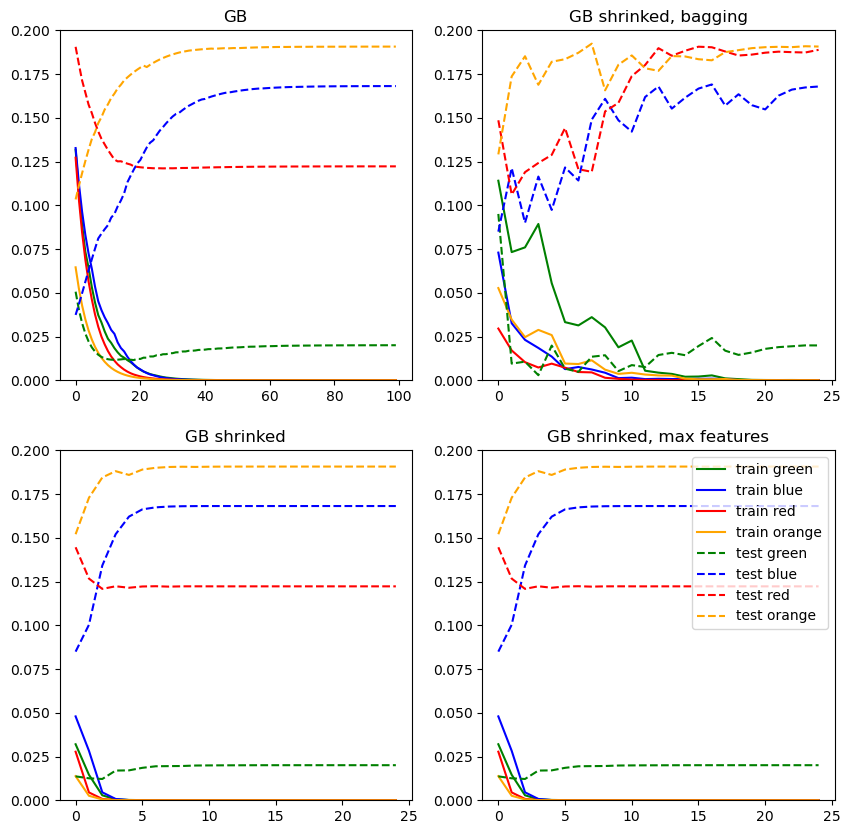

In [367]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for test_k, train_score in gb_train_scores.items():
    axs[0, 0].plot(
        np.array(train_score)[:,0],
        np.array(train_score)[:,1],
        color=test_k,
        label=f'train {test_k}'
    )
for test_k, test_score in gb_test_scores.items():
    axs[0, 0].plot(
        np.array(test_score)[:,0],
        np.array(test_score)[:,1],
        color=test_k,
        label=f'test {test_k}',
        linestyle='dashed'
    )
axs[0, 0].set_title('GB')
axs[0, 0].set_ylim(0, 0.2)

for test_k, train_score in gb1_train_scores.items():
    axs[1, 0].plot(
        np.array(train_score)[:,0],
        np.array(train_score)[:,1],
        color=test_k,
        label=f'train {test_k}'
    )
for test_k, test_score in gb1_test_scores.items():
    axs[1, 0].plot(
        np.array(test_score)[:,0],
        np.array(test_score)[:,1],
        color=test_k,
        label=f'test {test_k}',
        linestyle='dashed'
    )
axs[1, 0].set_title('GB shrinked')
axs[1, 0].set_ylim(0, 0.2)

for test_k, train_score in gb2_train_scores.items():
    axs[0, 1].plot(
        np.array(train_score)[:,0],
        np.array(train_score)[:,1],
        color=test_k,
        label=f'train {test_k}'
    )
for test_k, test_score in gb2_test_scores.items():
    axs[0, 1].plot(
        np.array(test_score)[:,0],
        np.array(test_score)[:,1],
        color=test_k,
        label=f'test {test_k}',
        linestyle='dashed'
    )
axs[0, 1].set_title('GB shrinked, bagging')
axs[0, 1].set_ylim(0, 0.2)


for test_k, train_score in gb3_train_scores.items():
    axs[1, 1].plot(
        np.array(train_score)[:,0],
        np.array(train_score)[:,1],
        color=test_k,
        label=f'train {test_k}'
    )
for test_k, test_score in gb3_test_scores.items():
    axs[1, 1].plot(
        np.array(test_score)[:,0],
        np.array(test_score)[:,1],
        color=test_k,
        label=f'test {test_k}',
        linestyle='dashed'
    )
axs[1, 1].legend(loc='upper right')
axs[1, 1].set_title('GB shrinked, max features')
axs[1, 1].set_ylim(0, 0.2)

With all the result compiled, there are some conclusions that we can draw for this specific experiment.


### General conclusions
These points give a round picture of the use of regularization terms and the effect they can have on “overfit” data and the way they can improve out of sample error. But all of these depend a lot on the data available, the distribution of it an if when using them what values provide the best solution without sacrificing much performance. Where do we should stop trying to regularize and save computing power.

### References

Abu-Mostafa, Y. S., Magdon-Ismail, M., & Lin, H. (2012). Learning from data: a short course. [United States], AMLBook.com.

Bickel, P. J., Li, B., Tsybakov, A. B., van de Geer, S. A., Yu, B., Valdés, T., Rivero, C., Fan, J., & van der Vaart, A. (2006). Regularization in statistics. Test, 15(2), 271–344. https://doi.org/10.1007/BF02607055

Sklearn.linear_model.LinearRegression. (n.d.). Scikit-Learn. Retrieved May 28, 2023, from https://scikit-learn/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Karim, R. (2020, October 5). Intuitions on L1 and L2 Regularisation. Medium. https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261

Sklearn.ensemble.GradientBoostingRegressor. (n.d.). Scikit-Learn. Retrieved May 30, 2023, from https://scikit-learn/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

Gradient Boosting regularization. (n.d.). Scikit-Learn. Retrieved May 30, 2023, from https://scikit-learn/stable/auto_examples/ensemble/plot_gradient_boosting_regularization.html

Zhou, Y., & Hooker, G. (2019). Boulevard: Regularized Stochastic Gradient Boosted Trees and Their Limiting Distribution (arXiv:1806.09762). arXiv. https://doi.org/10.48550/arXiv.1806.09762

Li, Y., Wei, C., & Ma, T. (2020). Towards Explaining the Regularization Effect of Initial Large Learning Rate in Training Neural Networks (arXiv:1907.04595). arXiv. https://doi.org/10.48550/arXiv.1907.04595
